In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#from src import utils

target_col = 'SalePrice'

In [2]:
train = pd.read_csv(os.path.join('../data/raw/train.csv'), index_col='Id')
test = pd.read_csv(os.path.join('../data/raw/test.csv'), index_col='Id')

In [3]:
train_target = train[target_col]
train_data = train.drop(columns=target_col)

In [4]:
All_data = pd.concat([train_data, test], axis=0, sort=True)
print(All_data.dtypes.value_counts())
print('Dimensions:', All_data.shape)

object     43
int64      25
float64    11
dtype: int64
Dimensions: (2919, 79)


In [5]:
num_All_data = All_data.select_dtypes(include = ['int64', 'float64'])
display(num_All_data.head(3))
display(num_All_data.columns.values)

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,5,7,0,0,8,856.0,0,2003,2003,2008
2,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,8,6,0,0,6,1262.0,298,1976,1976,2007
3,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,5,7,0,0,6,920.0,0,2001,2002,2008


array(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea',
       'GarageCars', 'GarageYrBlt', 'GrLivArea', 'HalfBath',
       'KitchenAbvGr', 'LotArea', 'LotFrontage', 'LowQualFinSF',
       'MSSubClass', 'MasVnrArea', 'MiscVal', 'MoSold', 'OpenPorchSF',
       'OverallCond', 'OverallQual', 'PoolArea', 'ScreenPorch',
       'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt',
       'YearRemodAdd', 'YrSold'], dtype=object)

In [6]:
cat_col = ['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold']
All_data.loc[:, cat_col] = All_data.loc[:, cat_col].astype('object')
All_data.dtypes.value_counts()

object     48
int64      20
float64    11
dtype: int64

In [7]:
missing_columns = All_data.columns[All_data.isnull().any()].values
missing_columns = len(All_data) - All_data.loc[:, np.sum(All_data.isnull())>0].count()
missing_columns

Alley           2721
BsmtCond          82
BsmtExposure      82
BsmtFinSF1         1
BsmtFinSF2         1
BsmtFinType1      79
BsmtFinType2      80
BsmtFullBath       2
BsmtHalfBath       2
BsmtQual          81
BsmtUnfSF          1
Electrical         1
Exterior1st        1
Exterior2nd        1
Fence           2348
FireplaceQu     1420
Functional         2
GarageArea         1
GarageCars         1
GarageCond       159
GarageFinish     159
GarageQual       159
GarageType       157
GarageYrBlt      159
KitchenQual        1
LotFrontage      486
MSZoning           4
MasVnrArea        23
MasVnrType        24
MiscFeature     2814
PoolQC          2909
SaleType           1
TotalBsmtSF        1
Utilities          2
dtype: int64

In [8]:
nan_has_sense = ['PoolQC','MiscFeature','Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageCond','GarageFinish',
             'GarageQual','BsmtFinType2','BsmtExposure','BsmtQual','BsmtCond','BsmtFinType1','MasVnrType']

to_impute_by_none = All_data.loc[:, nan_has_sense]
for i in to_impute_by_none.columns:
    All_data[i].fillna('None', inplace = True)

In [9]:
cat_col = ['Electrical', 'MSZoning','Utilities','Exterior1st','Exterior2nd','KitchenQual','Functional', 'SaleType']

to_impute_by_mode =  All_data.loc[:, cat_col]
for i in to_impute_by_mode.columns:
    All_data[i].fillna(All_data[i].mode()[0], inplace = True)

In [10]:
num_col = ['BsmtFullBath','BsmtHalfBath', 'GarageCars', 'MasVnrArea', 'GarageYrBlt', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageArea']

to_impute_by_median = All_data.loc[:, num_col]
for i in to_impute_by_median.columns:
    All_data[i].fillna(All_data[i].median(), inplace = True)

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df = All_data.reset_index().drop(columns=['Id','LotFrontage'], axis=1)
df = df.apply(le.fit_transform) 

df['LotFrontage'] = All_data['LotFrontage']
df = df.set_index('LotFrontage').reset_index()

In [12]:
corr = df.corr()
display(corr['LotFrontage'].sort_values(ascending = False)[:5])
display(corr['LotFrontage'].sort_values(ascending = False)[-5:])

LotFrontage    1.000000
1stFlrSF       0.130401
LotArea        0.115656
GarageArea     0.114088
GarageCars     0.113656
Name: LotFrontage, dtype: float64

BsmtQual      -0.078099
GarageType    -0.079098
KitchenQual   -0.083599
MSSubClass    -0.091973
BldgType      -0.097402
Name: LotFrontage, dtype: float64

In [13]:
All_data['LotFrontage'] = All_data.groupby(['BldgType'])['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [14]:
skew_num = pd.DataFrame(data = All_data.select_dtypes(include = ['int64', 'float64']).skew(), columns=['Skewness'])
skew_num_sorted = skew_num.sort_values(ascending = False, by = 'Skewness')
skew_num_sorted.T

,MiscVal,PoolArea,LotArea,LowQualFinSF,3SsnPorch,KitchenAbvGr,BsmtFinSF2,EnclosedPorch,ScreenPorch,BsmtHalfBath,...,Fireplaces,HalfBath,BsmtFullBath,BedroomAbvGr,GarageArea,FullBath,GarageCars,GarageYrBlt,YearRemodAdd,YearBuilt
Skewness,21.95848,16.907017,12.829025,12.094977,11.381914,4.304467,4.148275,4.00595,3.948723,3.933616,...,0.733872,0.694924,0.625153,0.326492,0.241308,0.167692,-0.218705,-0.398781,-0.451252,-0.600114


In [15]:
All_data_num = All_data.select_dtypes(include = ['int64', 'float64'])
All_data_skewed = np.log1p(All_data_num[All_data_num.skew()[All_data_num.skew() > 0.5].index])

All_data_normal = All_data_num[All_data_num.skew()[All_data_num.skew() < 0.5].index]
    
All_data_num_all = pd.concat([All_data_skewed, All_data_normal], axis = 1)

All_data_num.update(All_data_num_all)

In [16]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
All_data_num_scaled = scaler.fit_transform(All_data_num)
All_data_num_scaled = pd.DataFrame(data = All_data_num_scaled, columns = All_data_num.columns, index = All_data_num.index)

In [17]:
All_data_cat = All_data.select_dtypes(include = ['object']).astype('category')

All_data_cat.LotShape.replace(to_replace = ['IR3', 'IR2', 'IR1', 'Reg'], value = [0, 1, 2, 3], inplace = True)
All_data_cat.LandContour.replace(to_replace = ['Low', 'Bnk', 'HLS', 'Lvl'], value = [0, 1, 2, 3], inplace = True)
All_data_cat.Utilities.replace(to_replace = ['NoSeWa', 'AllPub'], value = [0, 1], inplace = True)
All_data_cat.LandSlope.replace(to_replace = ['Sev', 'Mod', 'Gtl'], value = [0, 1, 2], inplace = True)
All_data_cat.ExterQual.replace(to_replace = ['Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3], inplace = True)
All_data_cat.ExterCond.replace(to_replace = ['Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4], inplace = True)
All_data_cat.BsmtQual.replace(to_replace = ['None', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4], inplace = True)
All_data_cat.BsmtCond.replace(to_replace = ['None', 'Po', 'Fa', 'TA', 'Gd'], value = [0, 1, 2, 3, 4], inplace = True)
All_data_cat.BsmtExposure.replace(to_replace = ['None', 'No', 'Mn', 'Av', 'Gd'], value = [0, 1, 2, 3, 4], inplace = True)
All_data_cat.BsmtFinType1.replace(to_replace = ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], value = [0, 1, 2, 3, 4, 5, 6], inplace = True)
All_data_cat.BsmtFinType2.replace(to_replace = ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], value = [0, 1, 2, 3, 4, 5, 6], inplace = True)
All_data_cat.HeatingQC.replace(to_replace = ['Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4], inplace = True)
All_data_cat.Electrical.replace(to_replace = ['Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr'], value = [0, 1, 2, 3, 4], inplace = True)
All_data_cat.KitchenQual.replace(to_replace = ['Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3], inplace = True)
All_data_cat.Functional.replace(to_replace = ['Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'], value = [0, 1, 2, 3, 4, 5, 6], inplace = True)
All_data_cat.FireplaceQu.replace(to_replace =  ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4, 5], inplace = True)
All_data_cat.GarageFinish.replace(to_replace =  ['None', 'Unf', 'RFn', 'Fin'], value = [0, 1, 2, 3], inplace = True)
All_data_cat.GarageQual.replace(to_replace =  ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4, 5], inplace = True)
All_data_cat.GarageCond.replace(to_replace =  ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4, 5], inplace = True)
All_data_cat.PavedDrive.replace(to_replace =  ['N', 'P', 'Y'], value = [0, 1, 2], inplace = True)
All_data_cat.PoolQC.replace(to_replace =  ['None', 'Fa', 'Gd', 'Ex'], value = [0, 1, 2, 3], inplace = True)
All_data_cat.Fence.replace(to_replace =  ['None', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv'], value = [0, 1, 2, 3, 4], inplace = True)

In [18]:
All_data_cat.loc[:, ['OverallQual', 'OverallCond']] = All_data_cat.loc[:, ['OverallQual', 'OverallCond']].astype('int64')
All_data_label_encoded = All_data_cat.select_dtypes(include = ['int64'])

In [19]:
All_data_one_hot = All_data_cat.select_dtypes(include=['category'])
All_data_one_hot = pd.get_dummies(All_data_one_hot, drop_first=True)

In [20]:
All_data_encoded = pd.concat([All_data_one_hot, All_data_label_encoded], axis=1)
All_data_processed = pd.concat([All_data_num_scaled, All_data_encoded], axis=1)

In [21]:
train_final = All_data_processed.iloc[:train.shape[0], :]
test_final = All_data_processed.iloc[train.shape[0]:, :]

In [22]:
import pickle
from typing import Union
from pandas import DataFrame, Series
from pandas.core.indexes.base import Index as PandasIndex

In [23]:
def save_as_pickle(obj: Union[DataFrame, PandasIndex], path: str) -> None:
    if isinstance(obj, (DataFrame, Series)):
        obj.to_pickle(path)
    elif isinstance(obj, PandasIndex):
        with open('path', 'wb') as f:
            pickle.dump(obj, f)

In [24]:
save_as_pickle(train_final, os.path.join('../data/processed/train.pkl'))
save_as_pickle(test_final, os.path.join('../data/processed/test.pkl'))
save_as_pickle(train_target, os.path.join('../data/processed/train_target.pkl'))

In [25]:
train_final

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_Oth,SaleType_WD,Street_Pave,Utilities_0,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,OverallCond,OverallQual
Id,,,,,,,,,,,,,,,,,,,,,
1,-0.509394,1.029414,0.0,0.0,0.098337,0.000000,1.0,0.000000,-0.874234,0.000000,...,0,1,1,0,0,1,0,0,5,7
2,0.334634,0.000000,0.0,0.0,0.147667,0.000000,0.0,0.693147,-0.383315,0.000000,...,0,1,1,0,1,0,0,0,8,6
3,-0.352644,1.031539,0.0,0.0,0.041845,0.000000,1.0,0.000000,-0.056512,0.000000,...,0,1,1,0,0,1,0,0,5,7
4,-0.257852,1.010851,0.0,0.0,-0.080663,0.000000,1.0,0.000000,0.112025,5.609472,...,0,1,1,0,0,0,0,0,5,7
5,0.123060,1.061320,0.0,1.0,0.086991,0.000000,1.0,0.000000,0.037078,0.000000,...,0,1,1,0,0,1,0,0,5,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,-0.276027,0.997822,0.0,0.0,-0.895983,0.000000,0.0,0.000000,0.550417,0.000000,...,0,1,1,0,1,0,0,0,5,6
1457,1.414110,0.000000,0.0,0.0,0.115351,5.099866,1.0,0.000000,0.179033,0.000000,...,0,1,1,0,0,0,0,1,6,6
1458,0.203228,1.075009,0.0,1.0,-0.044215,0.000000,0.0,0.000000,0.486257,0.000000,...,0,1,1,0,0,0,0,1,9,7


In [26]:
test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml


# MODELING

In [27]:
import os
import numpy as np
import pandas as pd
import typing as tp
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from catboost import CatBoostRegressor, Pool

#from src import utils
#from src.visualization import visualize

RS = 35


In [28]:
train = pd.read_pickle(os.path.join('../data/processed/train.pkl'))
target = pd.read_pickle(os.path.join('../data/processed/train_target.pkl'))

In [29]:
train_data, val_data, train_target, val_target = train_test_split(train, target, train_size=0.8, random_state=RS)

In [30]:
metrics = [r2_score, mean_squared_error]

def evaluate(y_true: np.ndarray, y_pred: np.ndarray, metrics: tp.List[tp.Callable] = metrics) -> None:
    print(', '.join([f'{i.__name__}={i(y_true, y_pred):.4f}' for i in metrics]))

In [31]:
kf = KFold(n_splits=5, shuffle=True, random_state=RS)
for train_index, test_index in kf.split(train):
    X_train, X_test = train.iloc[train_index], train.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    
    ridge = Ridge(random_state=RS).fit(X_train, y_train)
    
    y_pred = ridge.predict(X_test)
    
    evaluate(y_test.to_numpy(), y_pred)

r2_score=0.8395, mean_squared_error=1117546234.1607
r2_score=0.8317, mean_squared_error=920279910.7714
r2_score=0.8778, mean_squared_error=800373252.6247
r2_score=0.6809, mean_squared_error=1912419776.4975
r2_score=0.8655, mean_squared_error=874002960.2389


In [32]:
parameters = {
    'fit_intercept': [True, False],
    'alpha': [0.1, 1, 5, 10, 15, 100],
    'tol': [1e-5, 1e-3, 1e-1],
    'positive': [True, False]
}

model = Ridge(random_state=RS, max_iter=1000)
clf = GridSearchCV(model, parameters, scoring='r2', cv=3)
clf.fit(train_data, train_target)
clf.best_params_

{'alpha': 15, 'fit_intercept': True, 'positive': False, 'tol': 1e-05}

In [33]:
ridge = Ridge(random_state=RS, max_iter=1000, **clf.best_params_).fit(train_data, train_target)
y_pred = ridge.predict(val_data)
evaluate(val_target.to_numpy(), y_pred)

r2_score=0.8481, mean_squared_error=1057620888.3932


In [34]:
def save_model(model, path: str) -> None:
    pickle.dump(model, open(path, 'wb'))

In [35]:
save_model(ridge, os.path.join('../models/ridge.pkl'))

# Catboost

In [36]:
pool = Pool(train_data, train_target, )

cb = CatBoostRegressor(iterations=3000, loss_function='RMSE', eval_metric='RMSE', learning_rate=0.03, silent=True)

cb.fit(pool, eval_set=(val_data, val_target), verbose=False, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [37]:
y_pred = cb.predict(val_data)
evaluate(val_target.to_numpy(), y_pred)

r2_score=0.8893, mean_squared_error=770236947.3897


In [38]:
save_model(cb, os.path.join('../models/catboost.pkl'))

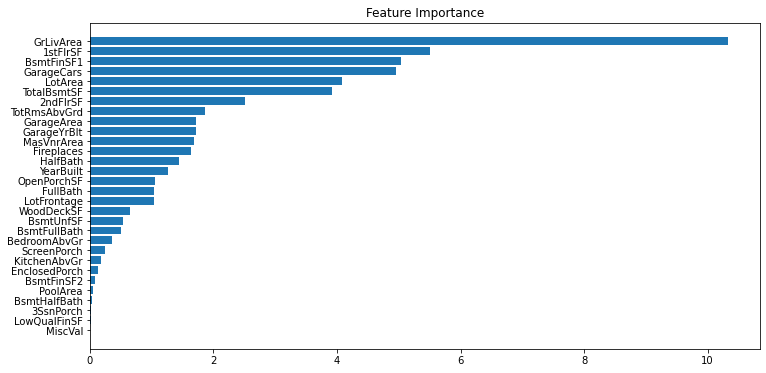

In [39]:
feature_importance = cb.feature_importances_[:30]
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')
plt.show()

In [40]:
def survey(results, category_names):
    
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(12, 8))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.8,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax

In [41]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


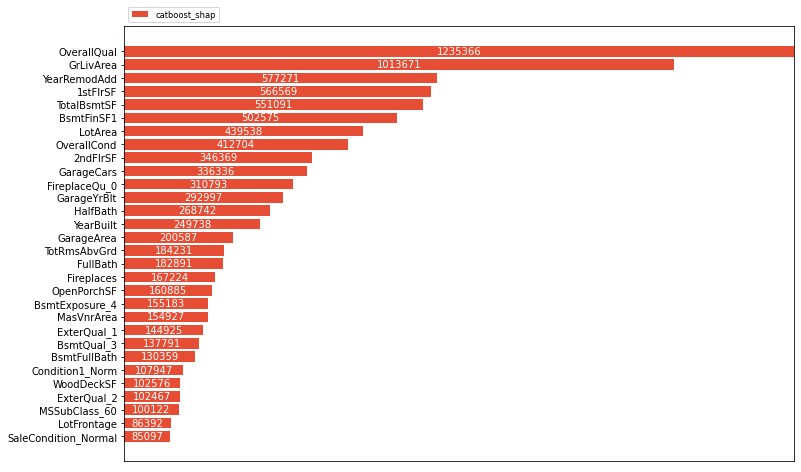

In [42]:
import shap

explainer = shap.Explainer(cb)
shap_values = explainer(train_data)
shap_importance = shap_values.abs.mean(0).values
results = {i: 100 * j for i, j in zip(train_data.columns, shap_importance)}
results_sorted = {k: [results[k]] for k in np.take_along_axis(np.array(list(results.keys())), np.argsort(np.array(list(results.values()))), 0)[::-1]}
results = {}
for i, k in enumerate(results_sorted):
    if i >= 30:
        break
    results[k] = results_sorted[k]

survey(results, ['catboost_shap'])

# INFERENCE

In [43]:
import os
import time
import numpy as np
import pandas as pd

In [44]:
train = pd.read_pickle(os.path.join('../data/processed/train.pkl'))
target = pd.read_pickle(os.path.join('../data/processed/train_target.pkl'))
test = pd.read_pickle(os.path.join('../data/processed/test.pkl'))

In [45]:
def load_model(path: str):
    return pickle.load(open(path, 'rb'))

In [46]:
ridge = load_model(os.path.join('../models/ridge.pkl'))
catboost = load_model(os.path.join('../models/catboost.pkl'))

In [47]:
results

{'OverallQual': [1235366.08849081],
 'GrLivArea': [1013671.3689927914],
 'YearRemodAdd': [577271.3430064099],
 '1stFlrSF': [566569.3837564553],
 'TotalBsmtSF': [551091.1839134049],
 'BsmtFinSF1': [502575.1797147842],
 'LotArea': [439538.50652225764],
 'OverallCond': [412704.4166809026],
 '2ndFlrSF': [346369.34361453104],
 'GarageCars': [336336.3944747689],
 'FireplaceQu_0': [310793.0961811622],
 'GarageYrBlt': [292997.327865272],
 'HalfBath': [268742.7188644635],
 'YearBuilt': [249738.73117925422],
 'GarageArea': [200587.064495149],
 'TotRmsAbvGrd': [184231.07023247704],
 'FullBath': [182891.049286945],
 'Fireplaces': [167224.06684973903],
 'OpenPorchSF': [160885.94257013567],
 'BsmtExposure_4': [155183.69323614467],
 'MasVnrArea': [154927.0091794463],
 'ExterQual_1': [144925.2541157183],
 'BsmtQual_3': [137791.59657867518],
 'BsmtFullBath': [130359.35987953533],
 'Condition1_Norm': [107947.12932669393],
 'WoodDeckSF': [102576.27384719902],
 'ExterQual_2': [102467.1015495742],
 'MSSubC

In [49]:
models = [ridge, catboost]
model.fit(train, target)
y_pred = model.predict(test)

result_final1 = {'id':[], 'sale':[]}
result_final = pd.DataFrame(result_final1)
result_final['sale'] = y_pred
result_final['id'] = test.index

In [50]:
result_final

,id,sale
0,1461,109712.472874
1,1462,147908.220548
2,1463,187924.845682
3,1464,195183.603785
4,1465,214880.227360
...,...,...
1454,2915,81874.534611
1455,2916,70636.230724
1456,2917,172233.409397
1457,2918,114305.109319


In [51]:
result_final.to_csv('../reports/result_final.csv')

In [52]:
test.index

Int64Index([1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469, 1470,
            ...
            2910, 2911, 2912, 2913, 2914, 2915, 2916, 2917, 2918, 2919],
           dtype='int64', name='Id', length=1459)